In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def generate_random_clusters_at(centers:list[tuple],spreads:list,num_points_per_cluster:list[int])->pd.core.frame.DataFrame:
    """_summary_

    Args:
        centers (list[tuple]): list of tuples of center coordinate
        spreads (list): list of floating point indicating spreads
        num_points_per_cluster (list[int]): number of points in each cluster.
    """

    num_clusters=len(centers)
    points=[]
    for iind in range(num_clusters):
        point=np.random.randn(num_points_per_cluster[iind],3)
        point[:,:2]=(point[:,:2]+centers[iind])*spreads[iind]
        point[:,2]=iind+1
        points.append(point)
    points = np.concatenate(points,axis=0)
    points=pd.DataFrame(points,columns=['x','y','label'])
    points['label']=pd.Categorical(points['label'])
    return points
    

In [3]:
centers=[(7,3),(3,7),(3,3),(7,7)]
spreads=[1.8,1.5,1.1,1.3]
num_points_per_cluster=[705,3801,915,750]
points=generate_random_clusters_at(centers,spreads,num_points_per_cluster)

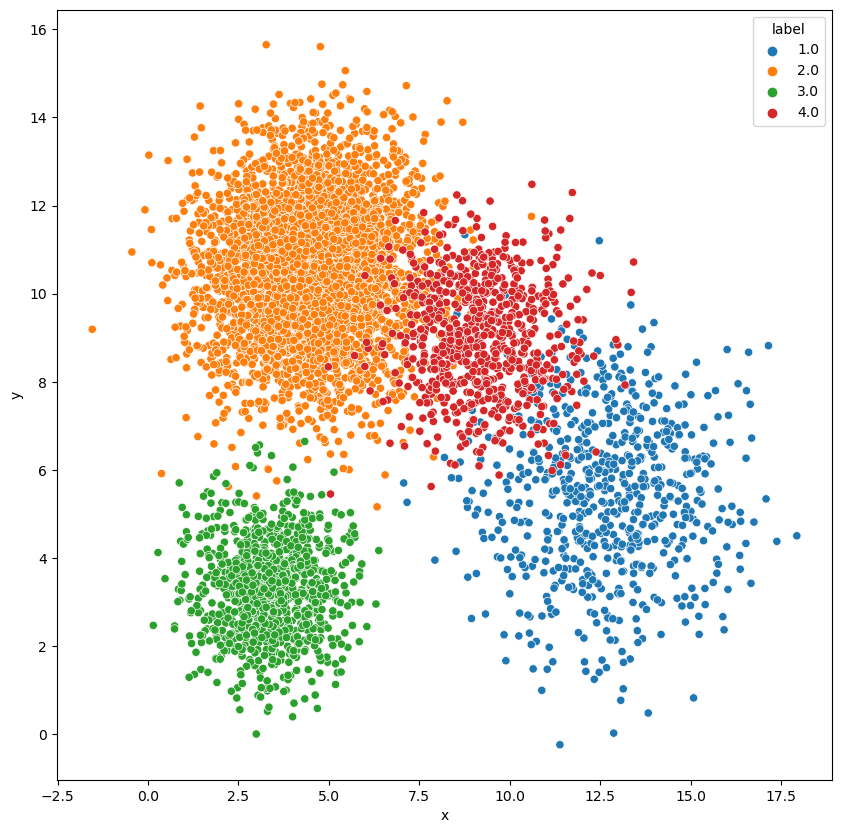

In [4]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=points,x='x',y='y',hue='label')
plt.show()
plt.close()

In [5]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [23]:
knc=[]
scores=[]
cv=5
for k in range(1,1000,5):
    knc.append([k,KNeighborsClassifier(n_neighbors=k)])
    score=cross_val_score(knc[-1][1],points[['x','y']],points['label'],cv=cv)
    scores=scores+[[k,score[iind]] for iind in range(cv)]


In [24]:
scores=pd.DataFrame.from_records(scores,columns=['Point','SCORE'])

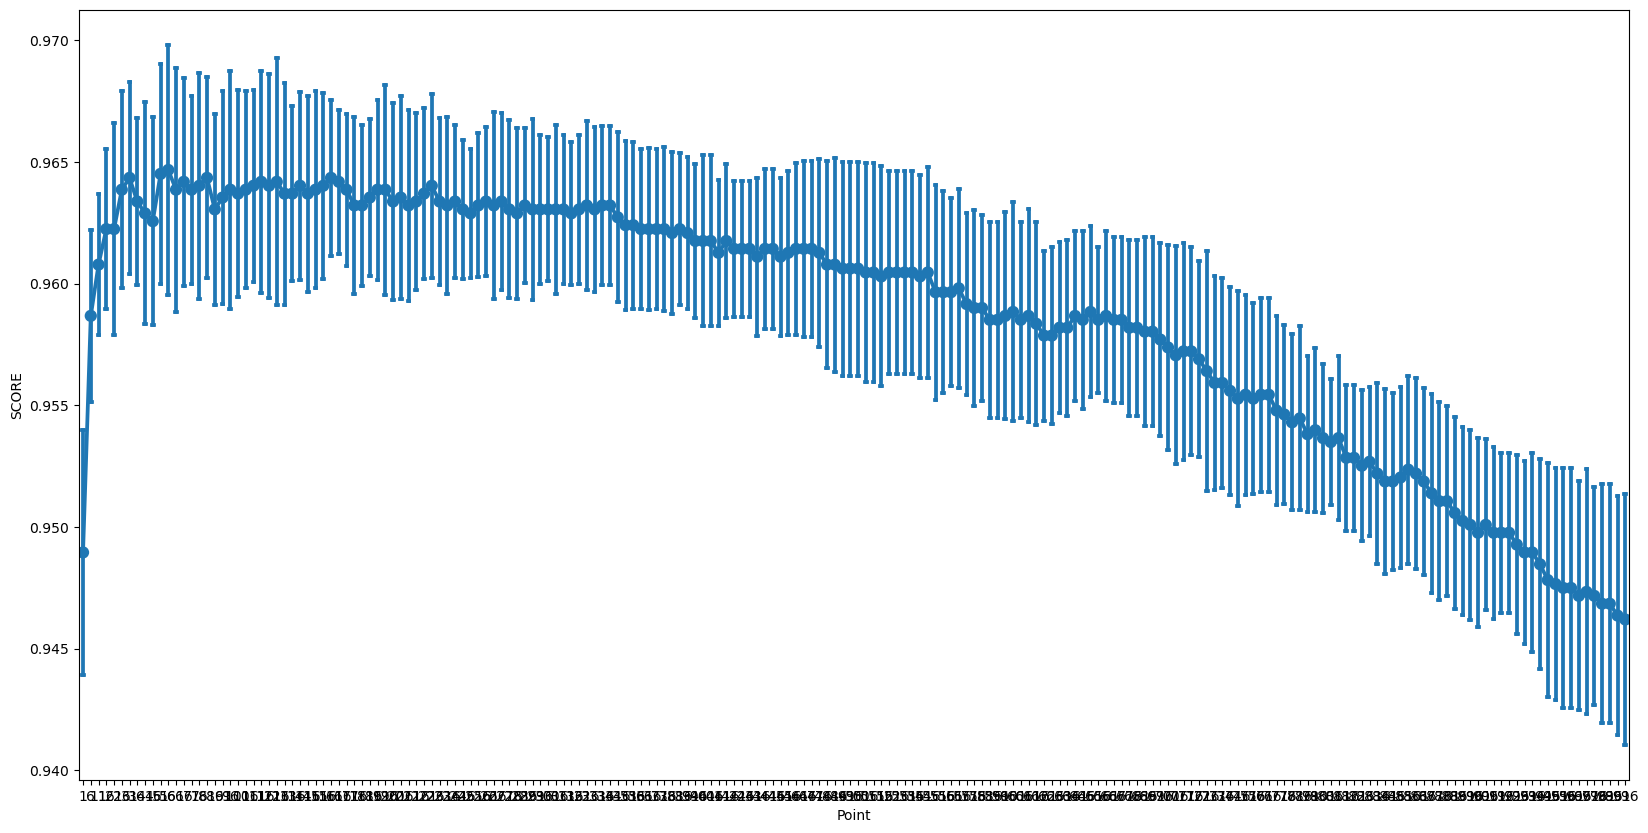

In [25]:
plt.figure(figsize=[20,10])
sns.pointplot(data=scores, x='Point', y='SCORE', dodge=0.25, capsize=0.25, errorbar='sd')
plt.show()
plt.close()

In [9]:
attribute_train,attribute_test,label_train,label_test=train_test_split(points[['x','y']],points['label'],test_size=0.3)

In [16]:
xmin = np.min(points['x'])
xmax = np.max(points['x'])
ymin = np.min(points['y'])
ymax = np.max(points['y'])
h=0.25

xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
xx_row = xx.ravel()
yy_row = yy.ravel()



c:\Users\mmanivan\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


c:\Users\mmanivan\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


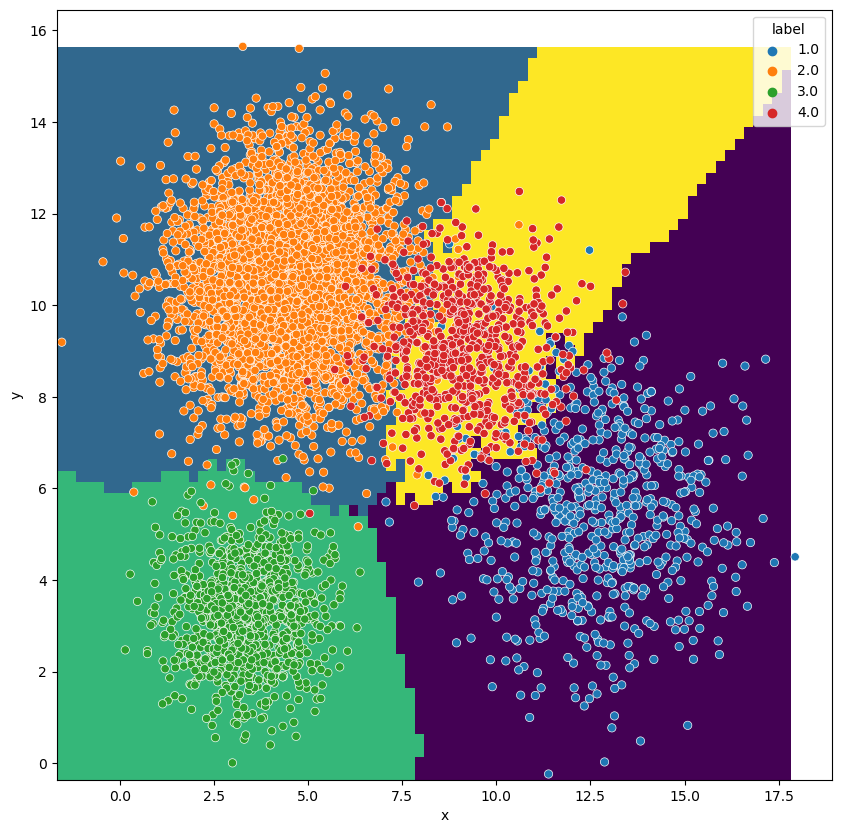

In [20]:
k = 6
knc = KNeighborsClassifier(n_neighbors=k)
knc.fit(attribute_train,label_train)
zz_row=knc.predict(np.c_[xx_row,yy_row])
zz=zz_row.reshape(xx.shape)

plt.figure(figsize=[10,10])
plt.pcolormesh(xx,yy,zz)
sns.scatterplot(data=points,x='x',y='y',hue='label')
plt.show()
plt.close()

c:\Users\mmanivan\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


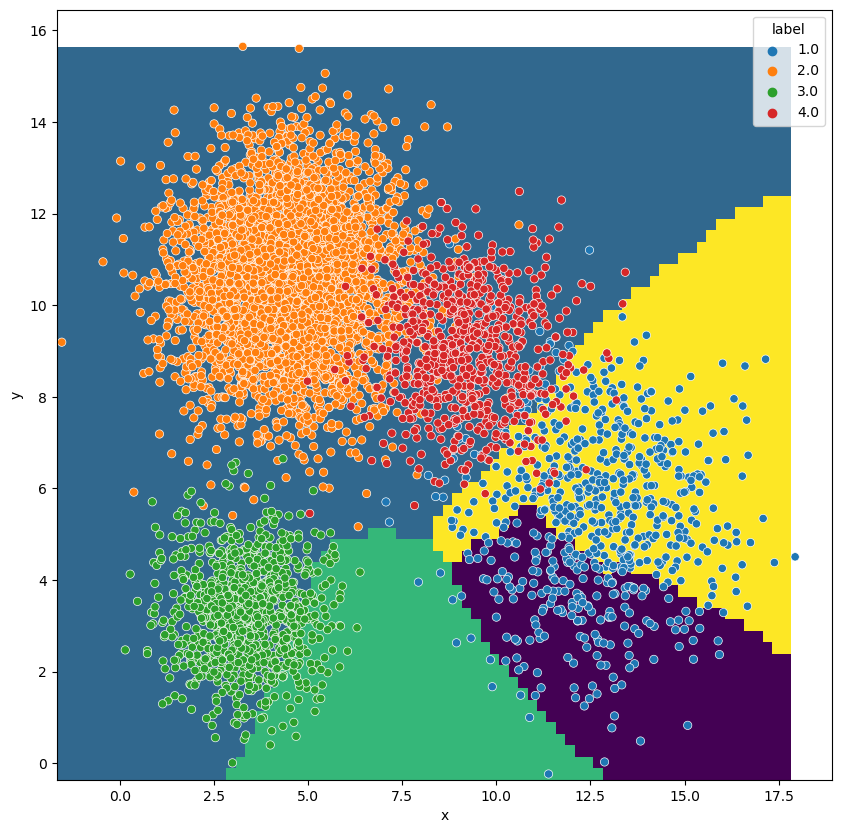

In [22]:
k = 1500
knc = KNeighborsClassifier(n_neighbors=k)
knc.fit(attribute_train,label_train)
zz_row=knc.predict(np.c_[xx_row,yy_row])
zz=zz_row.reshape(xx.shape)

plt.figure(figsize=[10,10])
plt.pcolormesh(xx,yy,zz)
sns.scatterplot(data=points,x='x',y='y',hue='label')
plt.show()
plt.close()